In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics as stat

In [3]:
#read csv file
df = pd.read_csv("./ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
# finding if there are any null value
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
salary_df= df["salary"]
salary_df.describe()

count    2.584000e+03
mean     2.103653e+05
std      8.080375e+05
min      6.000000e+03
25%      9.000000e+04
50%      1.346300e+05
75%      1.825625e+05
max      3.040000e+07
Name: salary, dtype: float64

In [7]:
# describing salary in usd
salary_usd_df= df["salary_in_usd"]
salary_usd_df.describe()

count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [8]:
new_df = df[["job_title", "salary_in_usd"]]
new_df

,job_title,salary_in_usd
0,Principal Data Scientist,85847
1,ML Engineer,30000
2,ML Engineer,25500
3,Data Scientist,175000
4,Data Scientist,120000
...,...,...
3750,Data Scientist,412000
3751,Principal Data Scientist,151000
3752,Data Scientist,105000
3753,Business Data Analyst,100000


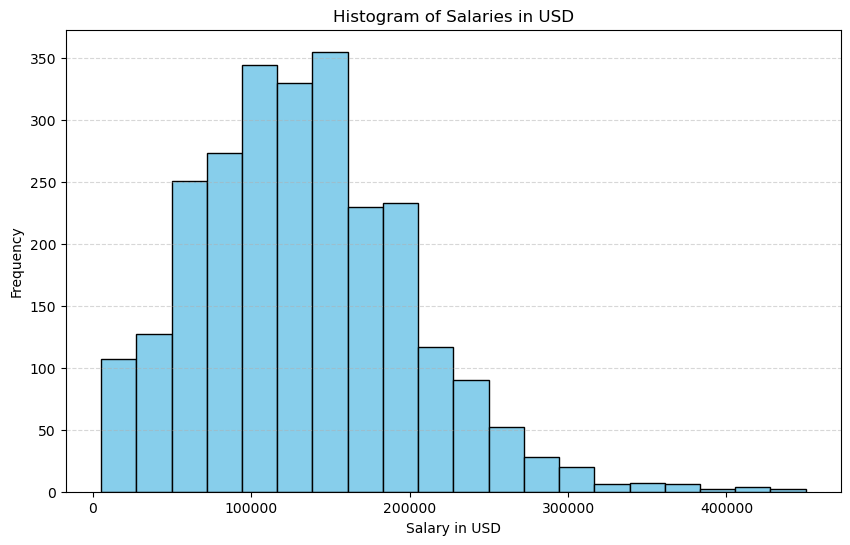

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=20, edgecolor='k', color='skyblue')
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries in USD")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [10]:
#calculating averge salary in usd
mean_salary_usd = round(new_df["salary_in_usd"].mean(), 2)
mean_salary_usd


133409.28

In [11]:

data= df[["work_year","employment_type","job_title","salary_in_usd","employee_residence"]]
data_df = pd.DataFrame(data)
data_df

,work_year,employment_type,job_title,salary_in_usd,employee_residence
0,2023,FT,Principal Data Scientist,85847,ES
1,2023,CT,ML Engineer,30000,US
2,2023,CT,ML Engineer,25500,US
3,2023,FT,Data Scientist,175000,CA
4,2023,FT,Data Scientist,120000,CA
...,...,...,...,...,...
3750,2020,FT,Data Scientist,412000,US
3751,2021,FT,Principal Data Scientist,151000,US
3752,2020,FT,Data Scientist,105000,US
3753,2020,CT,Business Data Analyst,100000,US


In [12]:
#calculating averge salary by country
average_salary_by_country = df.groupby("employee_residence")["salary_in_usd"].mean().reset_index()
average_salary_by_country = average_salary_by_country.rename(columns={"salary_in_usd": "Average_Salary_in_USD"})
average_salary_by_country= round(average_salary_by_country,2)
average_salary_by_country

,employee_residence,Average_Salary_in_USD
0,AE,100000.00
1,AM,50000.00
2,AR,35500.00
3,AS,32777.50
4,AT,71125.83
...,...,...
73,TR,19058.00
74,UA,57850.00
75,US,153972.21
76,UZ,103000.00


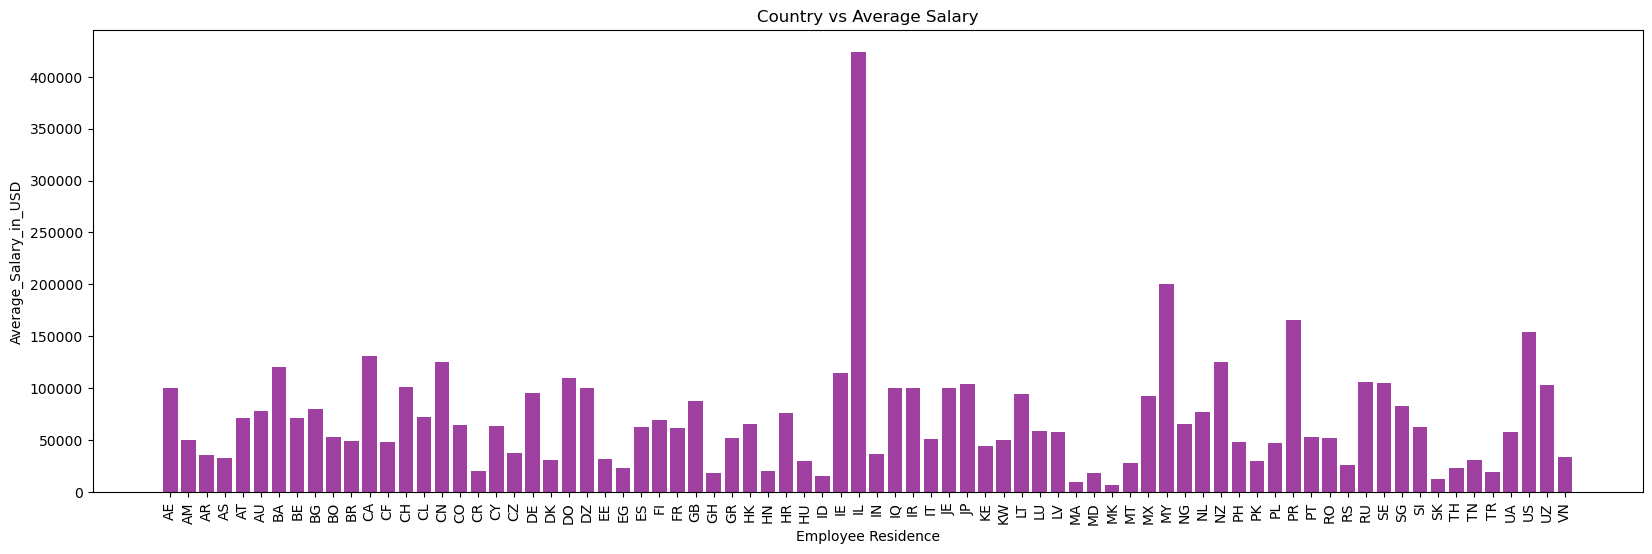

In [13]:
#plot bar chart Country vs Average Salary
fig = plt.figure(figsize = (20,6))
plt.bar(average_salary_by_country["employee_residence"], average_salary_by_country["Average_Salary_in_USD"],color ='purple',alpha=0.75)
plt.xlabel("Employee Residence")
plt.ylabel("Average_Salary_in_USD")
plt.title("Country vs Average Salary")
plt.xticks(rotation=90)
plt.show()

In [14]:
top_ten_countries = average_salary_by_country.nlargest(10, "Average_Salary_in_USD").reset_index()
top_ten_countries

,index,employee_residence,Average_Salary_in_USD
0,38,IL,423834.00
1,55,MY,200000.00
2,62,PR,166000.00
3,75,US,153972.21
4,11,CA,130859.84
5,15,CN,125404.00
6,58,NZ,125000.00
7,6,BA,120000.00
8,37,IE,114943.43
9,22,DO,110000.00


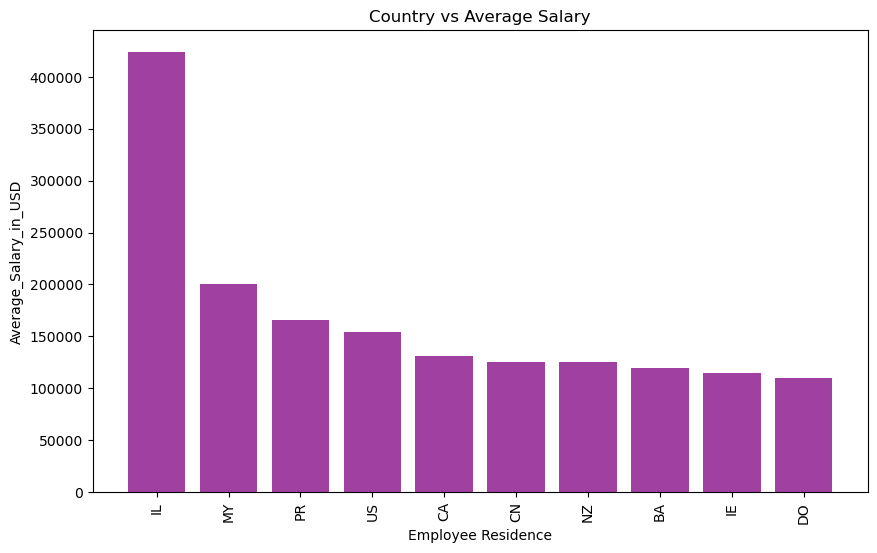

In [15]:
fig = plt.figure(figsize = (10,6))
plt.bar(top_ten_countries["employee_residence"], top_ten_countries["Average_Salary_in_USD"],color ='purple',alpha=0.75)
plt.xlabel("Employee Residence")
plt.ylabel("Average_Salary_in_USD")
plt.title("Country vs Average Salary")
plt.xticks(rotation=90)
plt.show()

# Geographical Salary Distribution Analysis:
The dataset showcases variations in average salaries across different countries, indicating differences in economic conditions and labor markets. Some countries, like the United States, offer high average salaries, while others, such as Vietnam, have lower averages. This data reflects the global diversity of data science professionals' residence locations and is valuable for making informed decisions about career opportunities in various countries. It underscores the importance of considering not only job roles but also economic factors when planning a data science career. Further analysis could explore the factors driving these salary disparities, including local job markets and industry demand.

In [33]:
title_salary_df= df.groupby("job_title")["salary_in_usd"].mean().reset_index()
title_salary_df= title_salary_df.rename(columns={"job_title": "Job_Title"})
title_salary_df= title_salary_df.rename(columns={"salary_in_usd": "Average_Salary_in_USD"})
title_salary_df= round(title_salary_df,2)
title_salary_df

,Job_Title,Average_Salary_in_USD
0,3D Computer Vision Researcher,21352.25
1,AI Developer,136666.09
2,AI Programmer,55000.00
3,AI Scientist,110120.88
4,Analytics Engineer,150151.75
...,...,...
88,Research Engineer,165909.39
89,Research Scientist,153486.37
90,Software Data Engineer,62510.00
91,Staff Data Analyst,15000.00


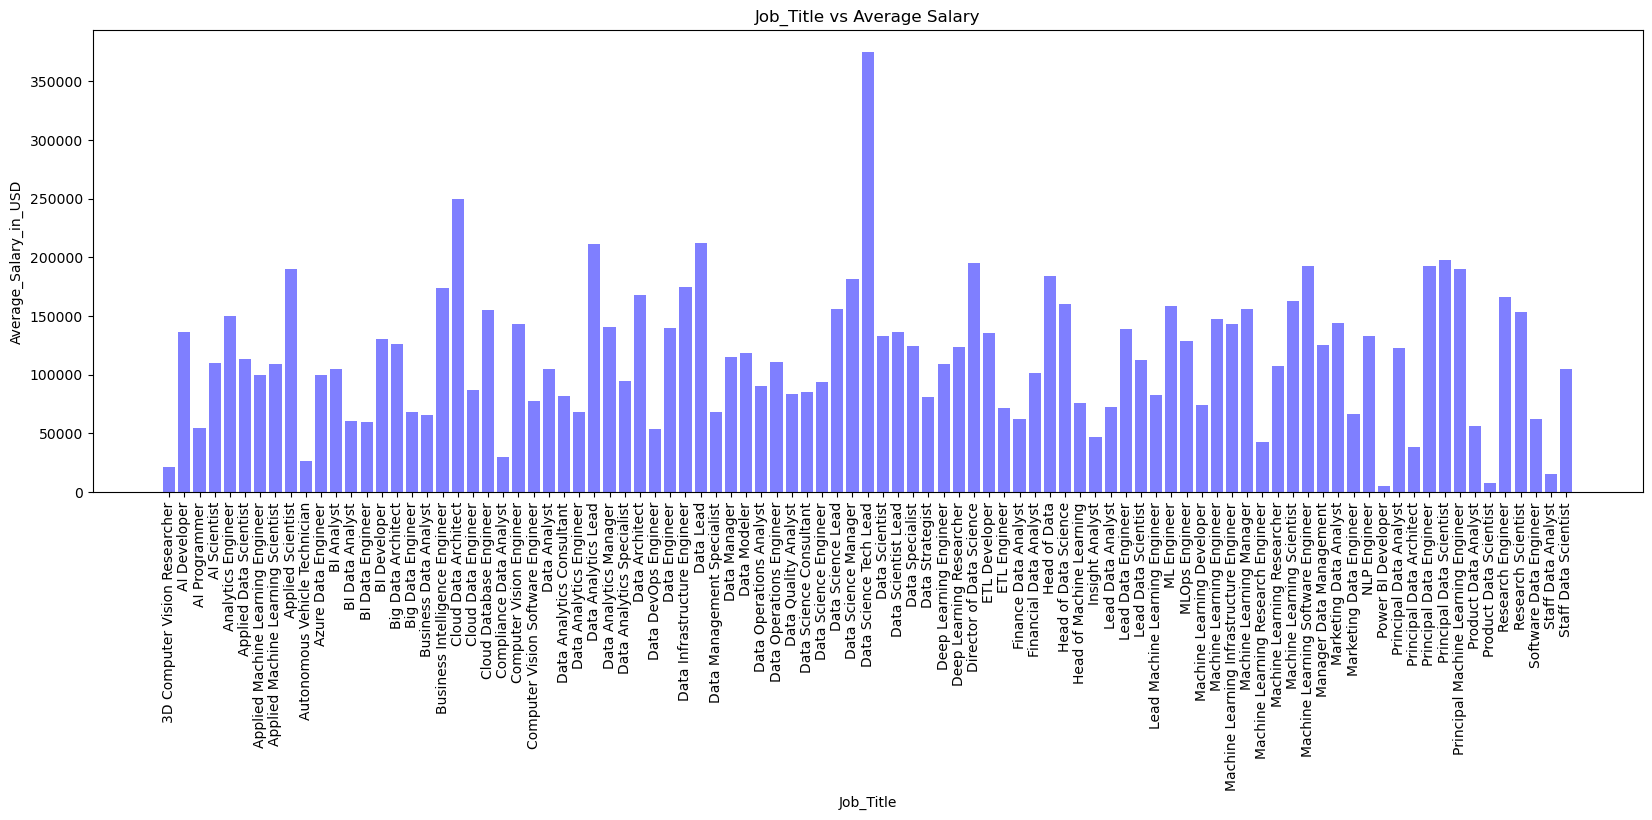

In [21]:
fig = plt.figure(figsize = (20,6))
plt.bar(title_salary_df["Job_Title"], title_salary_df["Average_Salary_in_USD"],color ='blue',alpha=0.50)
plt.xlabel("Job_Title")
plt.ylabel("Average_Salary_in_USD")
plt.title("Job_Title vs Average Salary")
plt.xticks(rotation=90)
plt.show()

In [22]:
title_salary_df= df.groupby("job_title")["salary_in_usd"].mean().reset_index()
title_salary_df= title_salary_df.rename(columns={"job_title": "Job_Title"})
title_salary_df= title_salary_df.rename(columns={"salary_in_usd": "Average_Salary_in_USD"})
title_salary_df= round(title_salary_df,2)
top_10_salary_titles = title_salary_df.nlargest(10, "Average_Salary_in_USD").reset_index()
top_10_salary_titles

,index,Job_Title,Average_Salary_in_USD
0,46,Data Science Tech Lead,375000.00
1,19,Cloud Data Architect,250000.00
2,35,Data Lead,212500.00
3,28,Data Analytics Lead,211254.50
4,84,Principal Data Scientist,198171.12
5,53,Director of Data Science,195140.73
6,83,Principal Data Engineer,192500.00
7,75,Machine Learning Software Engineer,192420.00
8,8,Applied Scientist,190342.58
9,85,Principal Machine Learning Engineer,190000.00


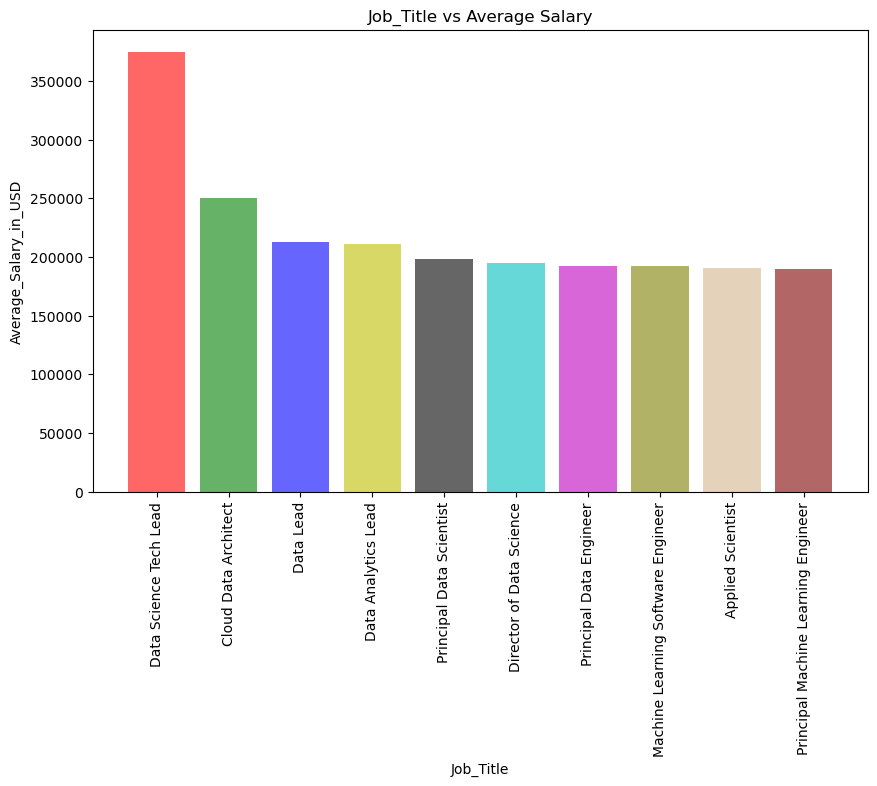

In [23]:
fig = plt.figure(figsize = (10,6))
color= ["r","g","b","y","k","c","m","olive","tan","maroon"]
plt.bar(top_10_salary_titles["Job_Title"], top_10_salary_titles["Average_Salary_in_USD"],color = color,alpha=0.60)
plt.xlabel("Job_Title")
plt.ylabel("Average_Salary_in_USD")
plt.title("Job_Title vs Average Salary")
plt.xticks(rotation=90)
plt.show()

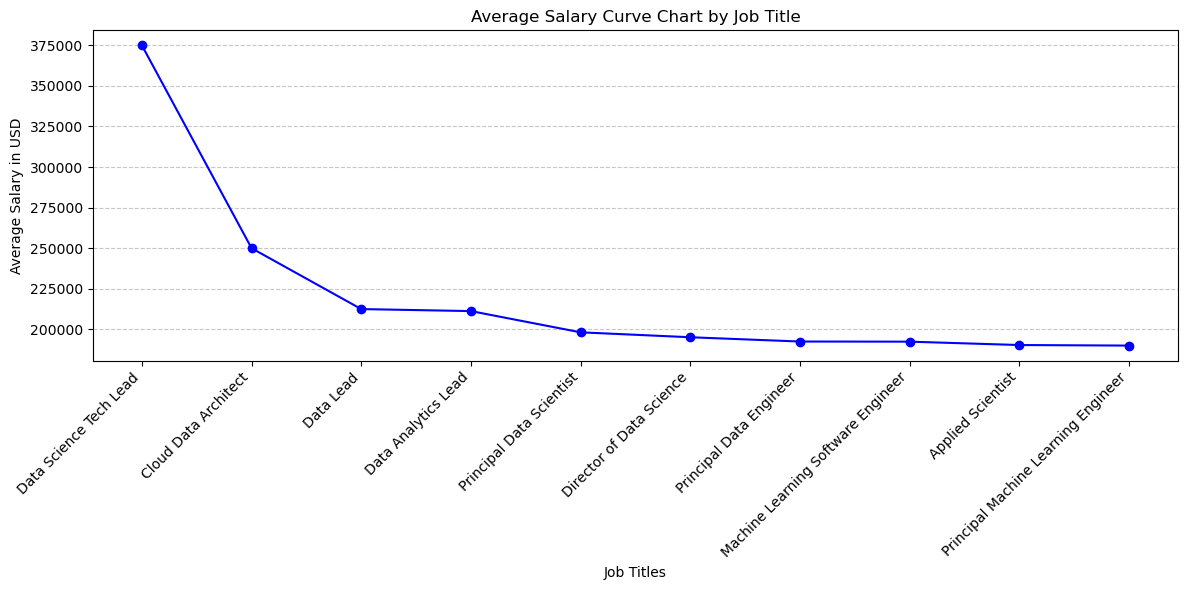

In [24]:
job_titles = [
    "Data Science Tech Lead",
    "Cloud Data Architect",
    "Data Lead",
    "Data Analytics Lead",
    "Principal Data Scientist",
    "Director of Data Science",
    "Principal Data Engineer",
    "Machine Learning Software Engineer",
    "Applied Scientist",
    "Principal Machine Learning Engineer",
]

salaries = [
    375000.00,
    250000.00,
    212500.00,
    211254.50,
    198171.12,
    195140.73,
    192500.00,
    192420.00,
    190342.58,
    190000.00,
]

# Create a curve chart
plt.figure(figsize=(12, 6))
plt.plot(job_titles, salaries, marker='o', linestyle='-', color='b')
plt.xlabel("Job Titles")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary Curve Chart by Job Title")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

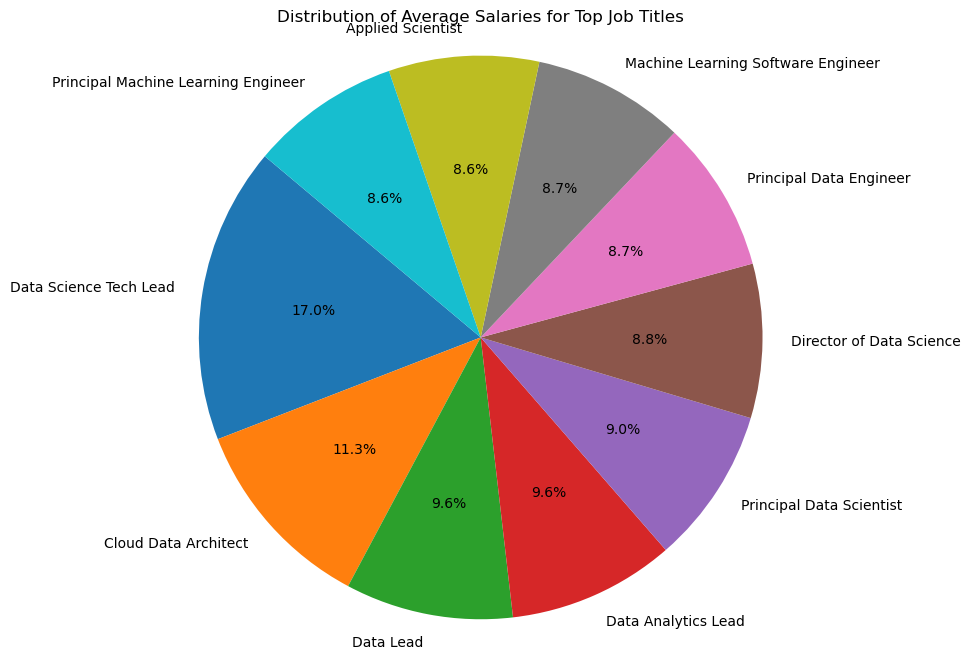

In [25]:
job_titles = [
    "Data Science Tech Lead",
    "Cloud Data Architect",
    "Data Lead",
    "Data Analytics Lead",
    "Principal Data Scientist",
    "Director of Data Science",
    "Principal Data Engineer",
    "Machine Learning Software Engineer",
    "Applied Scientist",
    "Principal Machine Learning Engineer",
]

salaries = [
    375000.00,
    250000.00,
    212500.00,
    211254.50,
    198171.12,
    195140.73,
    192500.00,
    192420.00,
    190342.58,
    190000.00,
]
plt.figure(figsize=(8, 8))
plt.pie(salaries, labels=job_titles, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Distribution of Average Salaries for Top Job Titles")
plt.show()

# Job Title Salary Distribution Analysis:
The analysis of job titles and their corresponding salaries in the field of data science reveals significant salary
variation across different roles. High-paying positions like "Data Science Tech Lead" and "Cloud Data Architect" 
offer substantial salaries, reflecting the value of specialized skills and expertise. 
Leadership roles, such as "Director of Data Science," also command competitive compensation. 
The dataset highlights the diversity of career paths within data science, encompassing technical, 
research, and leadership roles. 
The choice of job title plays a crucial role in determining salary levels, as exemplified by the 
"Data Science Tech Lead" position. Salary disparities may be influenced by market demand and industry trends. 
This analysis underscores the importance of informed career decisions and the potential for career growth in the 
dynamic data science industry.


In [26]:
bottom_10_salary_titles = title_salary_df.nsmallest(10, "Average_Salary_in_USD").reset_index()
bottom_10_salary_titles


,index,Job_Title,Average_Salary_in_USD
0,80,Power BI Developer,5409.00
1,87,Product Data Scientist,8000.00
2,91,Staff Data Analyst,15000.00
3,0,3D Computer Vision Researcher,21352.25
4,9,Autonomous Vehicle Technician,26277.50
5,22,Compliance Data Analyst,30000.00
6,82,Principal Data Architect,38154.00
7,72,Machine Learning Research Engineer,42819.25
8,61,Insight Analyst,46786.00
9,32,Data DevOps Engineer,53654.00


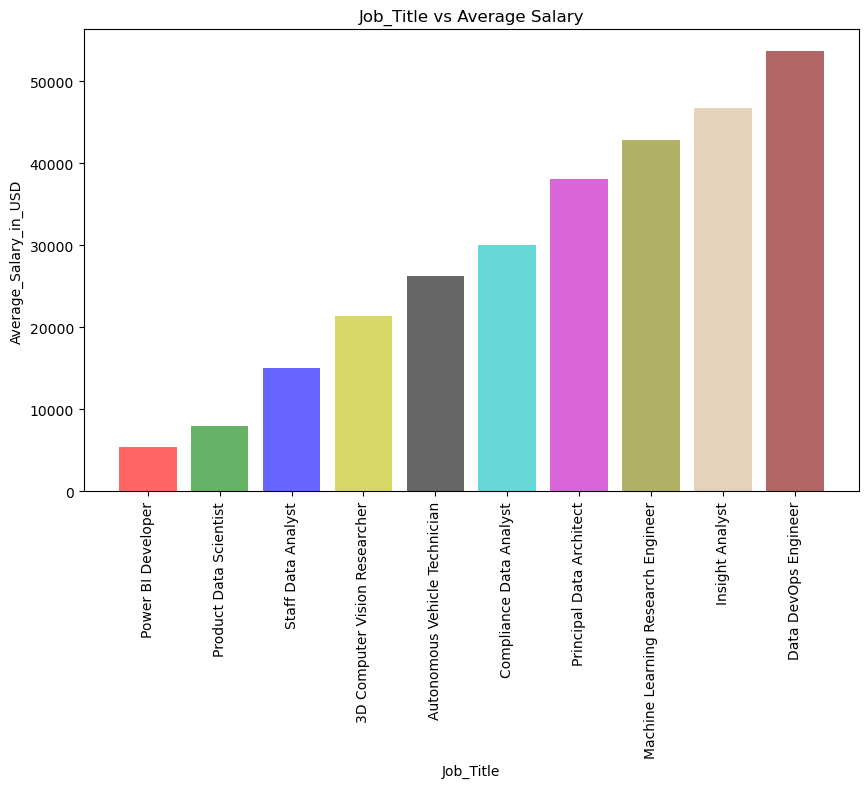

In [27]:
fig = plt.figure(figsize = (10,6))
color= ["r","g","b","y","k","c","m","olive","tan","maroon"]
plt.bar(bottom_10_salary_titles["Job_Title"], bottom_10_salary_titles["Average_Salary_in_USD"],color = color,alpha=0.60)
plt.xlabel("Job_Title")
plt.ylabel("Average_Salary_in_USD")
plt.title("Job_Title vs Average Salary")
plt.xticks(rotation=90)
plt.show()

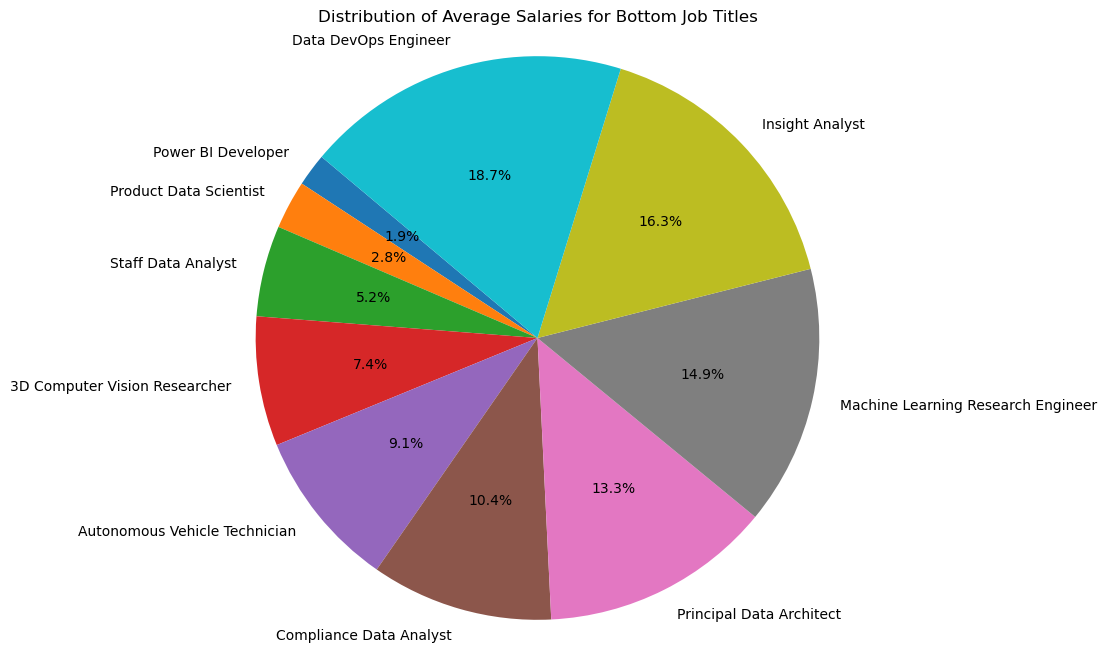

In [28]:
job_titles = [
    "Power BI Developer",
    "Product Data Scientist",
    "Staff Data Analyst",
    "3D Computer Vision Researcher",
    "Autonomous Vehicle Technician",
    "Compliance Data Analyst",
    "Principal Data Architect",
    "Machine Learning Research Engineer",
    "Insight Analyst",
    "Data DevOps Engineer",
]

salaries = [
    5409.00,
    8000.00,
    15000.00,
    21352.25,
    26277.50,
    30000.00,
    38154.00,
    42819.25,
    46786.00,
    53654.00,

]
plt.figure(figsize=(8, 8))
plt.pie(salaries, labels=job_titles, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Distribution of Average Salaries for Bottom Job Titles")
plt.show()

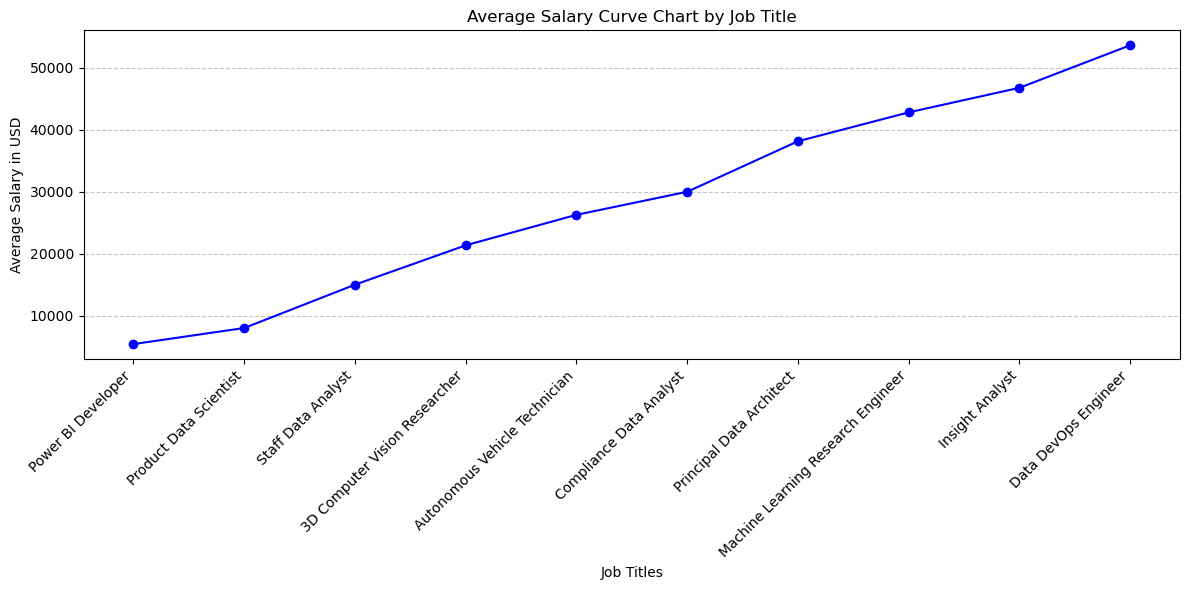

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(job_titles, salaries, marker='o', linestyle='-', color='b')
plt.xlabel("Job Titles")
plt.ylabel("Average Salary in USD")
plt.title("Average Salary Curve Chart by Job Title")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensure labels are not cut off
plt.show()